In [1]:
## IMPORTACIÓN GENERAL DE LIBRERIAS Y VISUALIZACIÓN DE DATOS (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as DT
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
plt.style.use('default') 
sns.set(style="whitegrid") 
plt.rcParams['figure.figsize'] = (15, 10)

In [2]:
import nltk

In [3]:
#Leemos el CSV
nlp = pd.read_csv('../data/train.csv')

In [121]:
nlp.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [4]:
nlp.shape

(7613, 5)

In [5]:
nlp['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

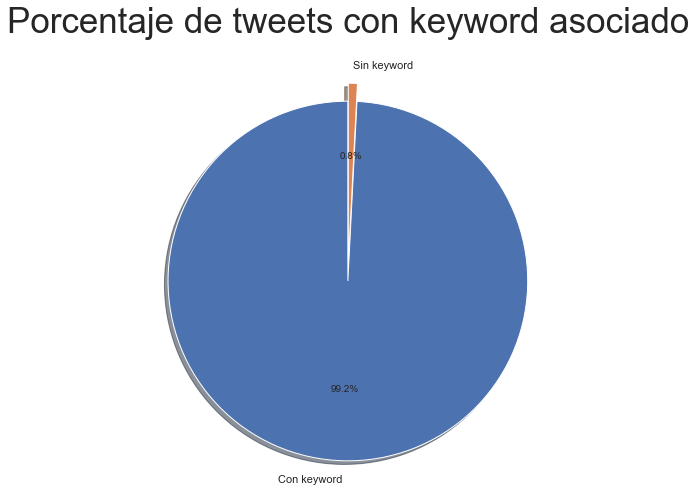

In [6]:
sin_keyword = nlp['keyword'].isnull().sum()
con_keyword = nlp['keyword'].count()-sin_keyword

sizes = [con_keyword, sin_keyword]
nombres = ["Con keyword", "Sin keyword"]

plt.figure(figsize=(11.7, 8.27))
plt.title('Porcentaje de tweets con keyword asociado', fontsize=35)
plt.pie(sizes, labels=nombres, autopct='%1.1f%%', shadow=True, startangle=90, explode=(0.1, 0))
plt.show()

In [7]:
cant_keyword = nlp['keyword'].value_counts().iloc[:20]

Text(0, 0.5, 'palabra clave')

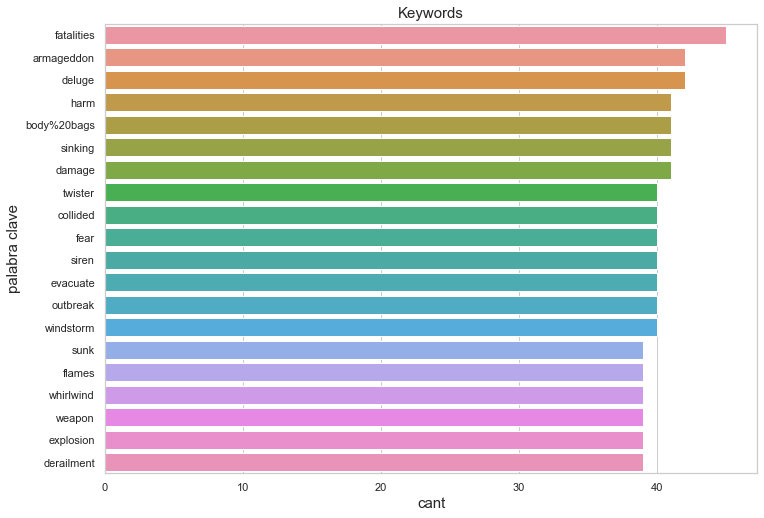

In [8]:
# Tamaño para hojas A4.
plt.figure(figsize=(11.7, 8.27))

ax = sns.barplot(x=cant_keyword.values, y=cant_keyword.index)

ax.set_title("Keywords",fontsize=15)
ax.set_xlabel("cant",fontsize=15)
ax.set_ylabel("palabra clave",fontsize=15)

In [10]:
target1 = nlp[nlp['target']==1]
cant_keyword_target1 = target1['keyword'].value_counts().iloc[:20]

Text(0, 0.5, 'palabra clave')

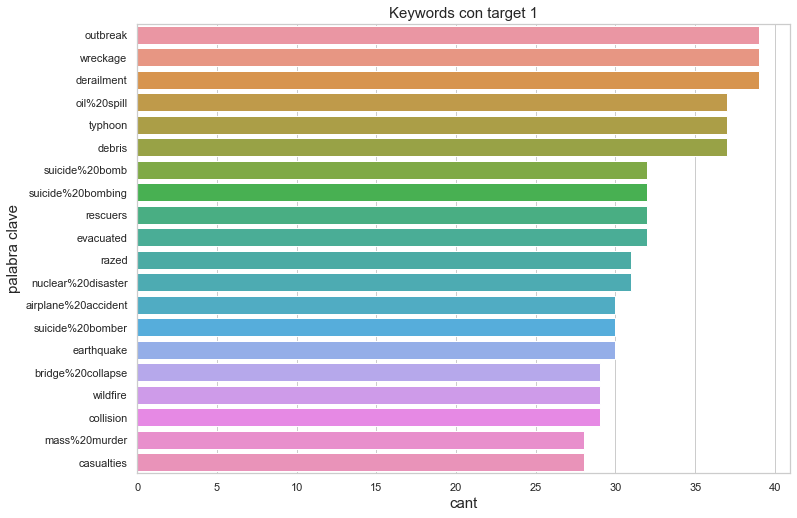

In [11]:
# Tamaño para hojas A4.
plt.figure(figsize=(11.7, 8.27))

ax = sns.barplot(x=cant_keyword_target1.values, y=cant_keyword_target1.index)

ax.set_title("Keywords con target 1",fontsize=15)
ax.set_xlabel("cant",fontsize=15)
ax.set_ylabel("palabra clave",fontsize=15)

In [12]:
target0 = nlp[nlp['target']==0]
cant_keyword_target0 = target0['keyword'].value_counts().iloc[:20]

Text(0, 0.5, 'palabra clave')

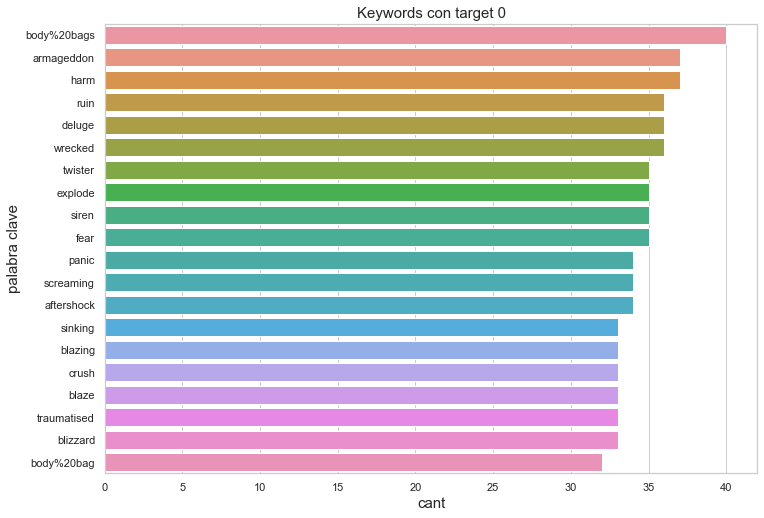

In [13]:
# Tamaño para hojas A4.
plt.figure(figsize=(11.7, 8.27))

ax = sns.barplot(x=cant_keyword_target0.values, y=cant_keyword_target0.index)

ax.set_title("Keywords con target 0",fontsize=15)
ax.set_xlabel("cant",fontsize=15)
ax.set_ylabel("palabra clave",fontsize=15)

In [122]:
keywords_df = nlp.groupby(['keyword', 'target'])[['text']].count().reset_index()
keywords_df['populares'] = keywords_df['keyword'].isin(cant_keyword.index)
keywords_df = keywords_df[keywords_df['populares']==True]
keywords_df.head()

,keyword,target,text,populares
15,armageddon,0,37,True
16,armageddon,1,5,True
57,body%20bags,0,40,True
58,body%20bags,1,1,True
97,collided,0,17,True


Text(0, 0.5, 'palabra clave')

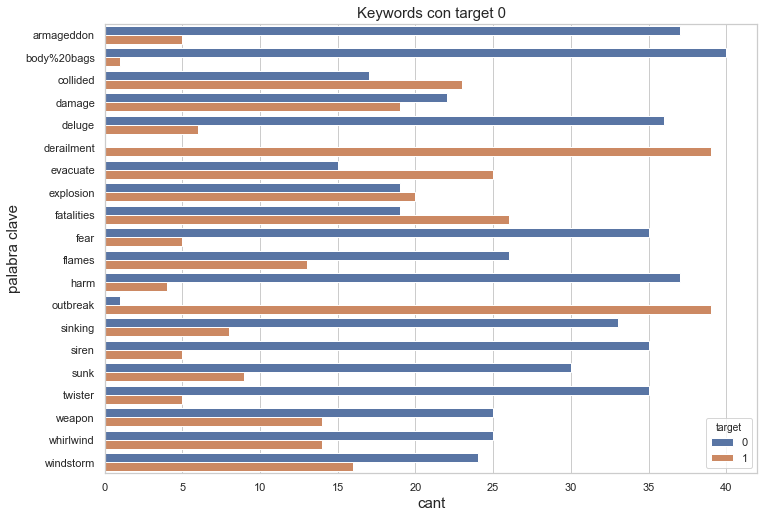

In [15]:
# Tamaño para hojas A4.
plt.figure(figsize=(11.7, 8.27))

ax = sns.barplot(x='text', y='keyword', hue='target', data=keywords_df)

ax.set_title("Keywords totales populares",fontsize=15)
ax.set_xlabel("cant",fontsize=15)
ax.set_ylabel("palabra clave",fontsize=15)

In [56]:
cant_keyword = nlp['keyword'].value_counts().iloc[:20]
cant_keyword.head(3)

fatalities    45
armageddon    42
deluge        42
Name: keyword, dtype: int64

In [117]:
df_target1 = keywords_df[keywords_df['target']==1].reset_index().rename(columns={'text':'cant_target1'})
df_target0 = keywords_df[keywords_df['target']==0].reset_index().rename(columns={'text':'cant_target0'})
df_totales = df_target1.merge(df_target0, how='outer', on='keyword')[['keyword', 'cant_target1', 'cant_target0' ]]
df_totales.fillna(0, inplace=True)
df_totales['cant_totales'] = df_totales['cant_target1'] + df_totales['cant_target0']
df_totales.sort_values(by='cant_totales', ascending = False, inplace=True)
df_totales.head(50)

,keyword,cant_target1,cant_target0,cant_totales
8,fatalities,26,19.0,45.0
0,armageddon,5,37.0,42.0
4,deluge,6,36.0,42.0
1,body%20bags,1,40.0,41.0
3,damage,19,22.0,41.0
13,sinking,8,33.0,41.0
11,harm,4,37.0,41.0
16,twister,5,35.0,40.0
14,siren,5,35.0,40.0
12,outbreak,39,1.0,40.0


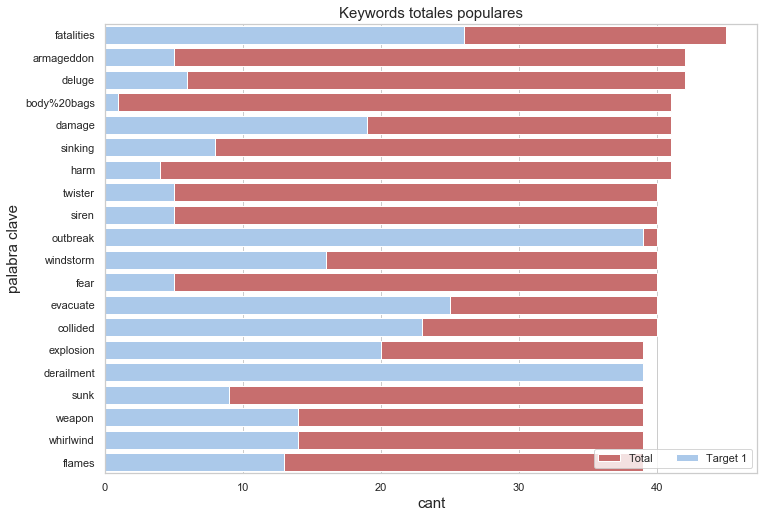

In [119]:
# Tamaño para hojas A4.
f, ax = plt.subplots(figsize=(11.7, 8.27))


sns.set_color_codes("muted")
sns.barplot(x='cant_totales', y='keyword', data=df_totales, label="Total", color="r")
            
sns.set_color_codes("pastel")
sns.barplot(x='cant_target1', y="keyword", data=df_totales, label="Target 1", color="b")

ax.set_title("Keywords totales populares",fontsize=15)
ax.set_xlabel("cant",fontsize=15)
ax.set_ylabel("palabra clave",fontsize=15)

ax.legend(ncol=2, loc="lower right", frameon=True)


In [15]:
df_hashtags = nlp[['text', 'target', 'keyword']]
df_hashtags.dropna(inplace=True)
df_hashtags

,text,target,keyword
31,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,ablaze
32,We always try to bring the heavy. #metal #RT h...,0,ablaze
33,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,ablaze
34,Crying out for more! Set me ablaze,0,ablaze
35,On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,ablaze
...,...,...,...
7578,@jt_ruff23 @cameronhacker and I wrecked you both,0,wrecked
7579,Three days off from work and they've pretty mu...,0,wrecked
7580,#FX #forex #trading Cramer: Iger's 3 words tha...,0,wrecked
7581,@engineshed Great atmosphere at the British Li...,0,wrecked


In [23]:
def filtrarPalabras(miArray):
    variable = ''
    for key in miArray:
         if '#' in str(key):
            variable = variable + ' ' + str(key)
    return variable

df_hashtags['words'] = nlp.text.str.strip().str.split()
df_hashtags = df_hashtags.assign(hashtags=[filtrarPalabras(el) for el in df_hashtags.words])
df_new = df_hashtags[['keyword', 'hashtags']].dropna(how='any')
df_new.head(10)

,keyword,hashtags
31,ablaze,
32,ablaze,#metal #RT
33,ablaze,#AFRICANBAZE:
34,ablaze,
35,ablaze,
36,ablaze,#mufc
37,ablaze,
38,ablaze,#Bridgetown
39,ablaze,
40,ablaze,#nsfw


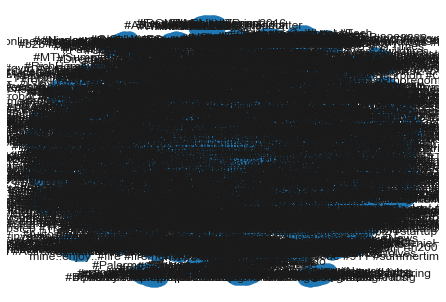

In [17]:
import networkx as nx

# Build your graph
G=nx.from_pandas_edgelist(df_new, 'hashtags', 'keyword')
 
# Plot it
nx.draw(G, with_labels=True)
plt.show()
 

In [26]:
# Build a dataframe with 4 connections
df = pd.DataFrame({ 'from':['#1', '#2', '#1','#3'], 'to':['abalaze', 'disaster', 'disaster','fired']})
df

,from,to
0,#1,abalaze
1,#2,disaster
2,#1,disaster
3,#3,fired


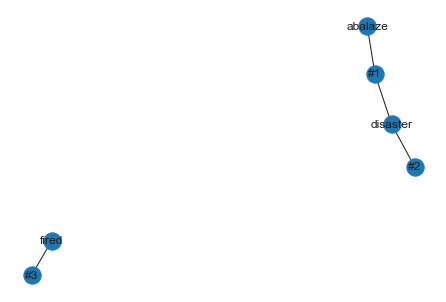

In [27]:
# Build your graph
G=nx.from_pandas_edgelist(df, 'from', 'to')

# Plot it
nx.draw(G, with_labels=True)
plt.show()

In [155]:
emojis = nlp[['keyword', 'target', 'text']]
emojis.dropna(inplace=True)
emojis.head(15)

,keyword,target,text
31,ablaze,1,@bbcmtd Wholesale Markets ablaze http://t.co/l...
32,ablaze,0,We always try to bring the heavy. #metal #RT h...
33,ablaze,1,#AFRICANBAZE: Breaking news:Nigeria flag set a...
34,ablaze,0,Crying out for more! Set me ablaze
35,ablaze,0,On plus side LOOK AT THE SKY LAST NIGHT IT WAS...
36,ablaze,0,@PhDSquares #mufc they've built so much hype a...
37,ablaze,1,INEC Office in Abia Set Ablaze - http://t.co/3...
38,ablaze,1,Barbados #Bridgetown JAMAICA ÛÒ Two cars set ...
39,ablaze,0,Ablaze for you Lord :D
40,ablaze,0,Check these out: http://t.co/rOI2NSmEJJ http:/...


In [160]:
emojis['ask'] = emojis['text'].str.count('[!]') + emojis['text'].str.count('[?]')# + emojis['text'].str.count('[:)]') + emojis['text'].str.count(':D')
emojis_agrupado = emojis.groupby('target').sum().reset_index()
emojis_agrupado.head(50)

,target,ask
0,0,3193
1,1,1073


Text(0, 0.5, 'Cantidad')

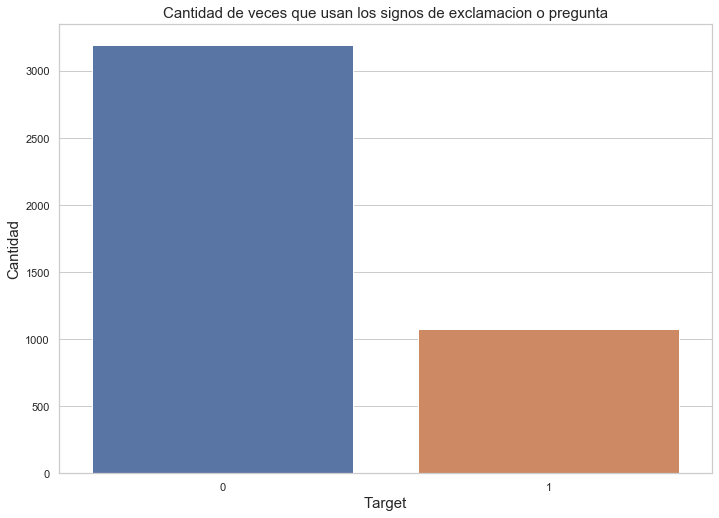

In [162]:
# Tamaño para hojas A4.
plt.figure(figsize=(11.7, 8.27))

ax = sns.barplot(x='target', y='ask', data=emojis_agrupado)

ax.set_title("Cantidad de veces que usan los signos de exclamacion o pregunta",fontsize=15)
ax.set_xlabel("Target",fontsize=15)
ax.set_ylabel("Cantidad",fontsize=15)

In [ ]:
nlp_sin_nulos = nlp.dropna(subset=['keyword'])
nlp_sin_nulos['h'] = nlp_sin_nulos['text'].str.count("#")
nlp_sin_nulos = nlp_sin_nulos[nlp_sin_nulos['target']==1]
nlp_sin_nulos = nlp_sin_nulos[nlp_sin_nulos['h']==1]
nlp_sin_nulos['hashtags'] = nlp_sin_nulos['text'].str.findall(r'#.*?(?=\s|$)')
nlp_sin_nulos['hashtags'] = nlp_sin_nulos['hashtags'].astype(str)
nlp_sin_nulos = nlp_sin_nulos.iloc[:50]
nlp_sin_nulos.head(15)

In [ ]:
import networkx as nx

# Tamaño para hojas A4.
plt.figure(figsize=(11.7, 8.27))

# Build your graph
G=nx.from_pandas_edgelist(nlp_sin_nulos, 'keyword', 'hashtags') #(df, from, to)

# Plot it
nx.draw(G, with_labels=True)
plt.show()

In [4]:
new = nlp

In [6]:
new['tokens'] = nltk.word_tokenize(new['text'])


LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\pizzi/nltk_data'
    - 'C:\\Users\\pizzi\\Anaconda3\\nltk_data'
    - 'C:\\Users\\pizzi\\Anaconda3\\share\\nltk_data'
    - 'C:\\Users\\pizzi\\Anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\pizzi\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************
